# Machine Learning - Homework 2

In [26]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split

%matplotlib inline

In [27]:
# set the seeds for reproducibility
random.seed(412)
np.random.seed(412)

# Generate Data for Regression

In [28]:
def mapping(x, slope, bias):
  y = slope * x + bias  # linear function
  return y


def generate_data(f, N, x_min, x_max):
  x_standard = np.random.rand(N, 1) # x values uniformly sampled from range [0, 1]
  x = x_standard * (x_max - x_min) + x_min   # carrying x values to the desired range [x_min, x_max]
  y = f(x) # compute y values from the underlying function f
  eps = 0.1 * np.random.randn(*y.shape)   # Gaussian noise with 0.1 standard deviation
  return x, y + eps   # return x's and corrupted f(x) values

In [29]:
### PARAMETERS FOR THE DATA GENERATION ###
slope, bias = 2.5, 0.5    # slope (w1) and bias (w0) of the linear component
x_min, x_max = 0.0, 1.0   # range of x values
N = 50                   # number of samples

# set the slope, bias parameters of the mapping() function; leave x
f = lambda x : mapping(x, slope=slope, bias=bias)

# generate N samples with function f, where the x is in range [x_min, x_max]
x, y = generate_data(f, N, x_min, x_max)
print('x.shape :', x.shape, ', y.shape :', y.shape)

x.shape : (50, 1) , y.shape : (50, 1)


### 50% Train 50% Validation Split

In [30]:
# Partition the dataset into train and test datasets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

# Make a scatter plot of the data

In [31]:
def plot_samples(train_data, name ,val_data=None):
  fig, ax = plt.subplots(figsize=(16, 12), dpi=100)

  x_train, y_train = train_data
  ax.scatter(x_train, y_train, label='train samples')
  if val_data:
    x_val, y_val = val_data
    ax.scatter(x_val, y_val, label='val samples')

  ax.set_xlim([-0.05, 1.05])  # need to change
  ax.set_ylim([-0.05, 3.55])  # need to change
  ax.set_xlabel('x', fontsize=12)
  ax.set_ylabel('f(x)', fontsize=12)
  ax.set_title(name)
  ax.legend(loc='lower right')
  return fig, ax

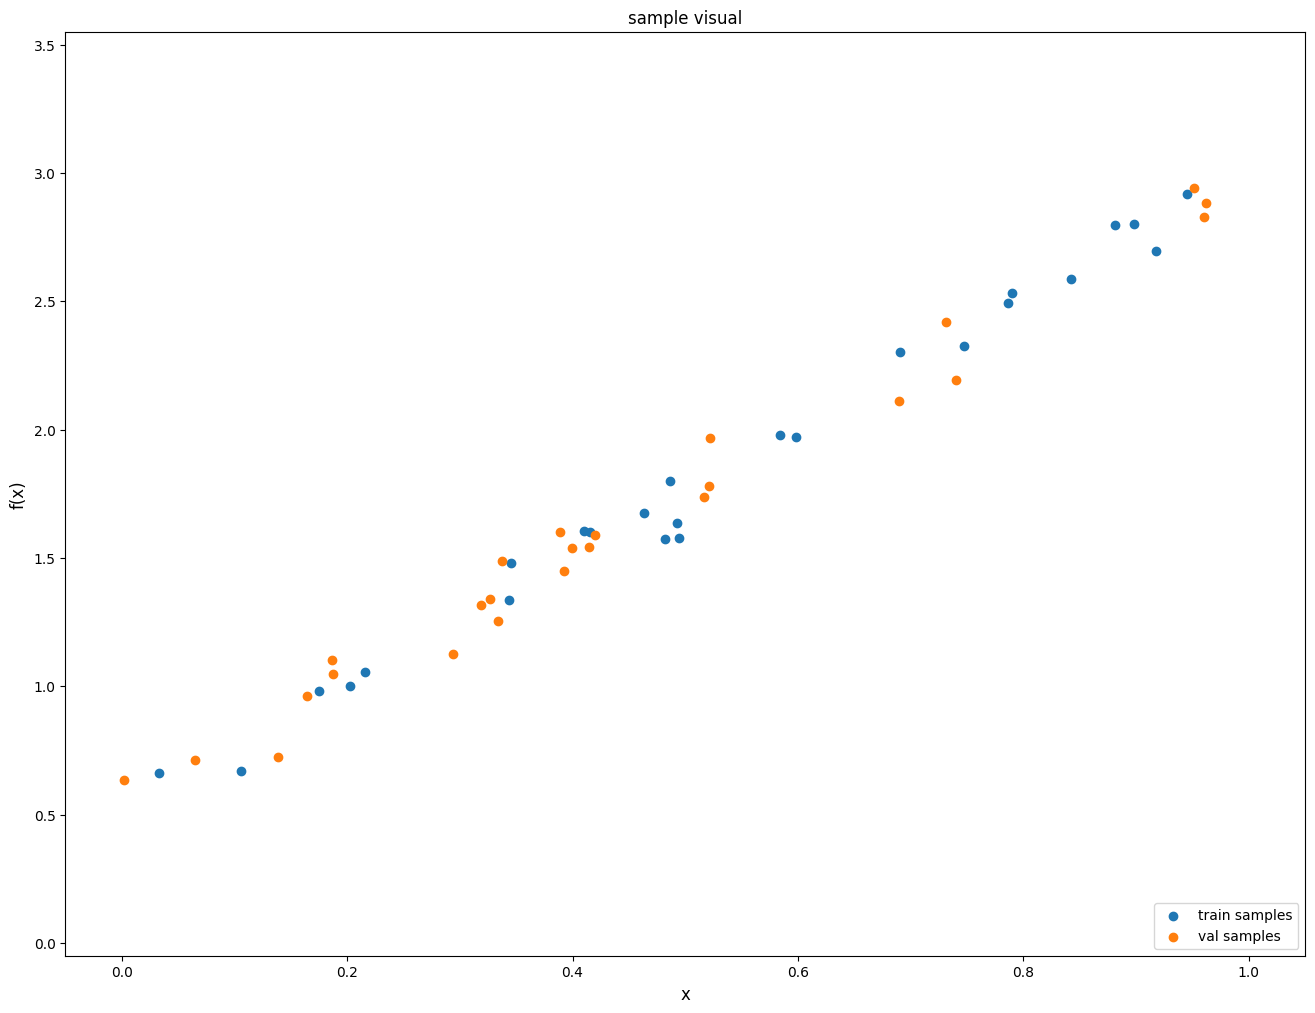

In [32]:
# Plot train and test datasets
fig, ax = plot_samples(train_data=(x_train, y_train), name="sample visual", val_data=(x_val, y_val))

# Function for plotting the MSE loss
This function is defined to plot the Mean Squared Error loss across training iterations.
Ensure this function is executed before it is called in subsequent cells of this notebook.

In [33]:
def plot_mse_loss(mse_values):
  plt.figure(figsize=(15, 9))
  plt.plot(mse_values, label='MSE per Iteration')
  plt.xlabel('Iteration')
  plt.ylabel('Mean Squared Error')
  plt.title('MSE During Training')
  plt.legend()
  plt.show()

In [34]:
del x, y, x_train, y_train, x_val, y_val # I am deleting the variables so that you can start from scratch

#**Your job starts here!**

In this homework, we'll explore different regression techniques and their applications using sklearn and NumPy libraries. We'll start by considering **Dataset 1** (see the PDF document for this homework), which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), and use linear regression to model this relationship.

First, let's generate Dataset 1:



In [35]:
# use the generate_data function to get x, y. Do not change N, x_min, and x_max
# split the data to train and validation sets 50%-50% <-- after splitting, you can add a print statement to check the data shapes

# Generate the dataset using the given function
x, y = generate_data(f, N, x_min, x_max)

# Split the dataset into 50% training and 50% validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

# Print shapes to verify the split
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")



x_train shape: (25, 1), y_train shape: (25, 1)
x_val shape: (25, 1), y_val shape: (25, 1)


# Part 1.a

Our objective in Part 1.a is to use sklearn's linear regression model on Dataset 1. The main steps are as follows:  

1.   Initialize the model
2.   Fit it to the data
3.   Make predictions on the validation set

Then, we will evaluate the performance of the model on the validation set using the **mean squared error (MSE)** metric and print the result.

In [37]:
# import the linear regression model from the sklearn.linear_model module.
# import the mean squared error function from sklearn.metrics

# initialize the linear regression model
# fit the model to the data
# find the model's predictions on the validation set

# evaluate the model's performance on the validation set using mean squared error (MSE)
# print the model's mean squared error using this--> print('MSE of sklearn model: ', mse_sklearn)


# Import required modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the validation set
y_pred = model.predict(x_val)

# Compute Mean Squared Error (MSE) on the validation set
mse_sklearn = mean_squared_error(y_val, y_pred)

# Print the MSE
print('MSE of sklearn model: ', mse_sklearn)


MSE of sklearn model:  0.00795462682779033


Next, we'll visualize the linear regression model's fit to Dataset 1 by drawing the **regression line** onto a scatter plot of the train and validation samples. To do this:

1.   Make a scatter plot of train and validation samples using the **plot_samples()** function.
2.   Draw the regression line onto this plot by following the directions in the comments.

By looking at the plot, we can get an idea of how well the linear regression model fits the data.

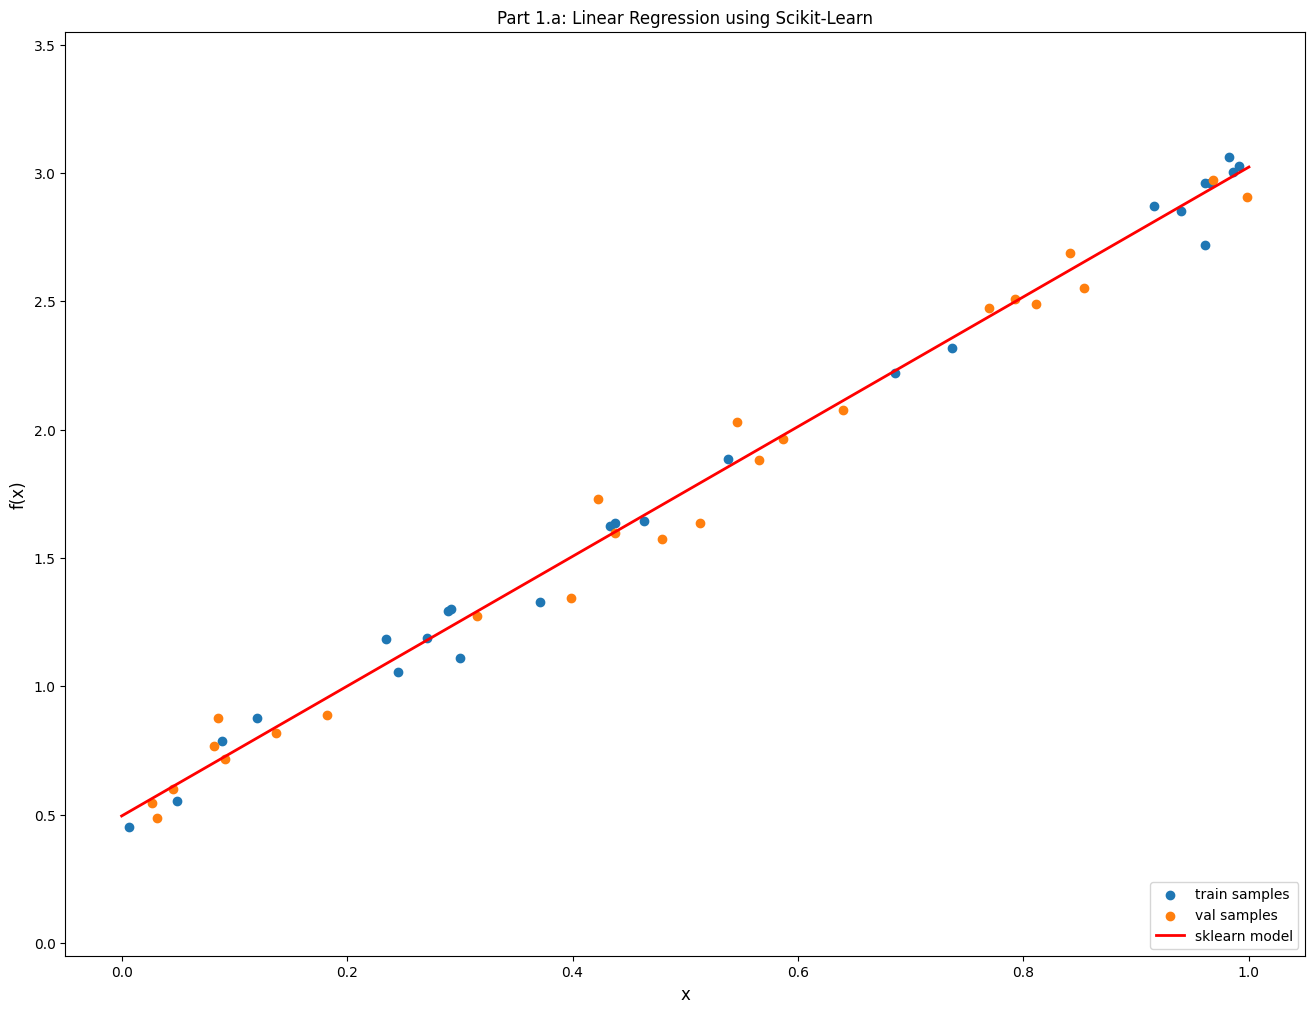

In [38]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
# fig, ax = plot_samples((), ()) # uncomment this line after filling in the parantheses, just like we did above

#x_grid = np.linspace(x_min, x_max, 100) # do not change anything in this line
# now use the model's predict() function on x_grid to find y_grid

# ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
# ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear



# Generate the scatter plot first
fig, ax = plot_samples(train_data=(x_train, y_train), name="Part 1.a: Linear Regression using Scikit-Learn", val_data=(x_val, y_val))

# Create a grid of x values for smooth regression line
x_grid = np.linspace(x_min, x_max, 100).reshape(-1, 1)  # Reshape for model input

# Predict y values along the x_grid
y_grid = model.predict(x_grid)

# Draw the regression line on the **same plot**
ax.plot(x_grid, y_grid, color='red', linewidth=2, label='sklearn model')

# Ensure the legend appears correctly
ax.legend(loc='lower right')

# Display the modified figure
plt.show()


In [39]:
# Print the regression coefficients
print(f"Regression Coefficients from sklearn model:")
print(f"Intercept (w0): {model.intercept_[0]:.4f}")  # Bias term
print(f"Slope (w1): {model.coef_[0,0]:.4f}")  # Weight for x


Regression Coefficients from sklearn model:
Intercept (w0): 0.4945
Slope (w1): 2.5284


Great! Now you know how to find the regression coefficients using the sklearn's linear regression model, and how to plot the regression line. Let's proceed to **Part 1.b**

# Part 1.b

In this part, we will use the pseudo-inverse solution manually to find the optimal regression coefficients. The main steps are as follows:

1.   Constructing the extended data matrix **X** that includes a column of ones for the bias (intercept) term.
2.   Taking the pseudo-inverse (pinv) of **X**.
3.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**.

*(Note that pinv(**X**) is a 2 x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions 2 x 1)*

In [40]:
from numpy.linalg import pinv
''' In the next two lines, construct the extended data matrices for training and validation,
by adding a column of ones to the original data matrix. For this, you can use np.concatenate()
function with the option axis=1. See the function documentation for further information'''
# 1. construct the extended data matrix for train
# 2. construct the extended data matrix for val

# print the shapes of the extended data matrices, just to check

# 3.1. find the pseudoinverse (pinv) of the extended data matrix
# 3.2. perform the matrix multiplication pinv(X_extended) * y to find regression coefficients (w) ## look up np.matmul() function

# find the models prediction on validation set
# evaluate the model's performance on the validation set using mean squared error (MSE)
# print the model's mean squared error using this --> print('MSE of manual model: ', mse)


# 1. Construct the extended data matrix for train (adding a column of ones for the bias term)
X_train_extended = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)

# 2. Construct the extended data matrix for validation
X_val_extended = np.concatenate((np.ones((x_val.shape[0], 1)), x_val), axis=1)

# Print the shapes of the extended data matrices
print(f"X_train_extended shape: {X_train_extended.shape}, y_train shape: {y_train.shape}")
print(f"X_val_extended shape: {X_val_extended.shape}, y_val shape: {y_val.shape}")

# 3.1. Find the pseudoinverse of the extended training data matrix
X_pinv = pinv(X_train_extended)  # Computes the Moore-Penrose pseudoinverse

# 3.2. Compute the regression coefficients using the pseudo-inverse formula: w = pinv(X) * y
w_manual = np.matmul(X_pinv, y_train)  # Equivalent to (X^T X)^(-1) X^T y


print()
print()
print()
# Print the manually computed regression coefficients
print(f"Regression Coefficients from manual model:")
print(f"Intercept (w0): {w_manual[0,0]:.4f}")
print(f"Slope (w1): {w_manual[1,0]:.4f}")

# Find the model's predictions on the validation set
y_pred_manual = np.matmul(X_val_extended, w_manual)

# Compute the Mean Squared Error (MSE) for the manual model
mse_manual = mean_squared_error(y_val, y_pred_manual)

# Print the MSE for comparison
print('MSE of manual model: ', mse_manual)


X_train_extended shape: (25, 2), y_train shape: (25, 1)
X_val_extended shape: (25, 2), y_val shape: (25, 1)



Regression Coefficients from manual model:
Intercept (w0): 0.4945
Slope (w1): 2.5284
MSE of manual model:  0.007954626827790374


Now that you have implemented your own linear regression algorithm and found the regression coefficients, let's visualize the results.

We will follow similar steps as in **Part 1.a** to draw the regression line found by your implementation onto the scatter plot of Dataset 1. Please follow the directives in the comments for details.

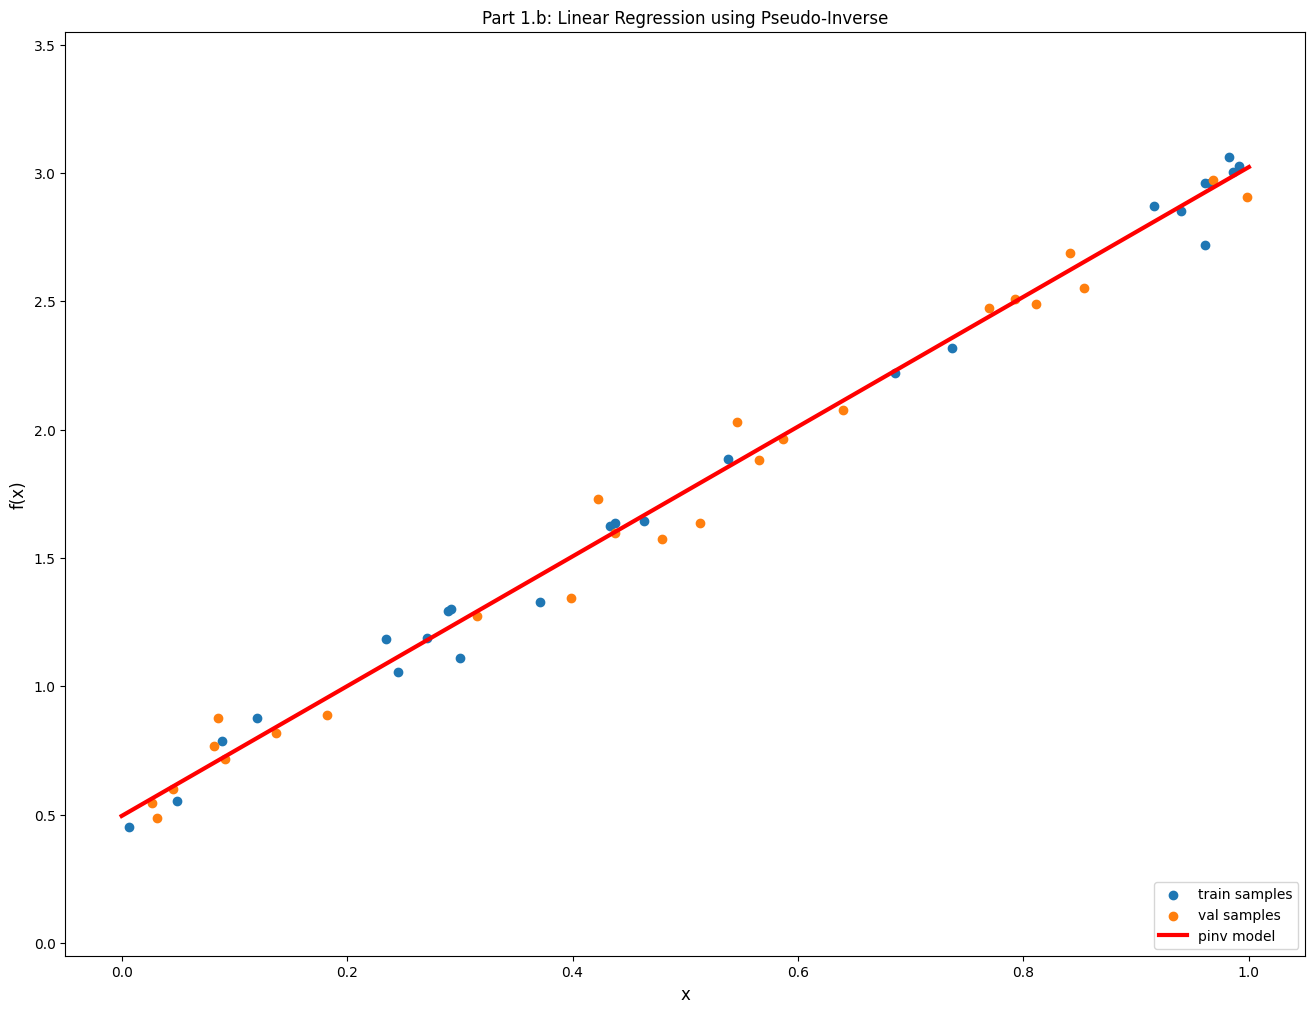

In [41]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
# fig, ax = plot_samples((), ()) # uncomment this line after filling in the parantheses, just like we did above

#x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# first, construct the extended version of x_grid, just like you did to train and validation data matrices
# now, using the regression coefficients, find the model's predictions (y_grid = Xw)

# ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid
# ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear

# Make a scatter plot of the train and validation samples
fig, ax = plot_samples(train_data=(x_train, y_train), name="Part 1.b: Linear Regression using Pseudo-Inverse", val_data=(x_val, y_val))

# Create a grid of x values from x_min to x_max (already given)
x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # Reshaped to (100,1)

# Construct the extended version of x_grid (adding a column of ones for bias term)
X_grid_extended = np.concatenate((np.ones((x_grid.shape[0], 1)), x_grid), axis=1)

# Compute predictions using manually computed regression coefficients (y_grid = X * w)
y_grid = np.matmul(X_grid_extended, w_manual)

# Plot the regression line on the scatter plot
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model')

# Add legend
ax.legend(loc='lower right')

# Display the modified figure
plt.show()  # Use plt.show() explicitly instead of display(fig)


In [42]:
# Print the manually computed regression coefficients
print(f"Regression Coefficients from manual (pseudoinverse) model:")
print(f"Intercept (w0): {w_manual[0,0]:.4f}")
print(f"Slope (w1): {w_manual[1,0]:.4f}")

# Print the regression coefficients from sklearn's model for comparison
print("\nRegression Coefficients from sklearn model:")
print(f"Intercept (w0): {model.intercept_[0]:.4f}")
print(f"Slope (w1): {model.coef_[0,0]:.4f}")

# Compare MSE values
print("\nMean Squared Error (MSE) Comparison:")
print(f"Sklearn Model MSE: {mse_sklearn:.6f}")
print(f"Manual Model MSE: {mse_manual:.6f}")


Regression Coefficients from manual (pseudoinverse) model:
Intercept (w0): 0.4945
Slope (w1): 2.5284

Regression Coefficients from sklearn model:
Intercept (w0): 0.4945
Slope (w1): 2.5284

Mean Squared Error (MSE) Comparison:
Sklearn Model MSE: 0.007955
Manual Model MSE: 0.007955


Now you also know how to find the regression coefficients manually using the pseudoinverse method. In the last piece of **Part 1**, we're going to find the regression via gradient descent (GD) method. Let's proceed:

# Part 1.c

In this part, we're going to implement gradient descent optimization algorithm to find regression coefficients in an iterative manner. Starting with initial regression coefficients, we're going to take small steps in directions which minimizes the mean squared error. The main steps of the algorithm are as follows:


0.   Make sure that your extended data matrices (computed in **Part 1.b**) have dimensions of (N x 2), where N is variable. We don't care about what N is, but the second dimension must be two!
1.   Initialize the regression coefficients (i.e., weights **w**) with some values, usually random or zero.
2.   Choose a step size (i.e., learning rate **lr**) which determines the size of the steps we take in the direction of minimizing the cost function (**MSE**).
3.   Repeat the following steps for **M** steps:

     1.   Compute the predicted values using the current regression coefficients and input data:
        **y_pred** = **X** * **w**
        
        *Note that **X** * **w** is matrix multiplication of **X** and **w**.*
     2.   Compute the difference between predicted and actual values (i.e., the error):
        **pred_error** = **e** = (**y_pred** - **y**)
     3.   Compute the gradient of the cost function with respect to the regression coefficients:
        **w_grad** = (transpose(**X**) * **e**) / **N**

        *Note that transpose(**X**) * **e** is matrix multiplication of transpose(**X**) and **e**, and **N** is the number of samples.*
     4.   Update the regression coefficients by subtracting the gradient times the learning rate from the current coefficients.
     
        (**w** = **w** - **w_grad** * **lr**)
     5.   Calculate the new value of the cost function (**MSE**) using the updated regression coefficients **w** and input data **X**.

4.   Return the final regression coefficients.

**Additional Info**

**X** is an N x 2 matrix. **y** is an N x 1 column vector. **w** is a 2 x 1 column vector. As a result of the matrix multiplication, **y_pred** = **X** * **w** should also have dimensions of N x 1, same with **y** !

transpose(**X**) has dimensions of 2 x N. Similarly, the matrix multiplication transpose(**X**) * **e** yields **w_grad** with dimensions 2 x 1, same with **w** !

These values are here for you to check yourself while writing your code. While developing your code, use the **shape** property of your numpy arrays sparingly!

In [43]:
# Hyperparameters
M = 1000  # Number of iterations
lr = 0.1  # Learning rate
mse_values = []  # To store the loss at each iteration

# Initialize regression coefficients randomly (2x1 vector, matching the size of w in previous parts)
w_gd = np.random.randn(2, 1)

# Gradient Descent Loop
for i in range(M):
    # 1. Compute predicted values using the current regression coefficients
    y_pred_gd = np.matmul(X_train_extended, w_gd)  # (N x 2) @ (2 x 1) = (N x 1)

    # 2. Compute the error (difference between predicted and actual values)
    pred_error = y_pred_gd - y_train  # (N x 1)

    # 3. Compute the gradient of the cost function
    w_grad = (np.matmul(X_train_extended.T, pred_error)) / X_train_extended.shape[0]  # (2 x N) @ (N x 1) = (2 x 1)

    # 4. Update the regression coefficients
    w_gd -= lr * w_grad  # Gradient Descent step

    # 5. Compute MSE using updated coefficients
    mse_gd = mean_squared_error(y_train, y_pred_gd)

    # 6. Store MSE for analysis
    mse_values.append(mse_gd)

    # Print MSE at certain intervals
    if (i == 0) or ((i+1) % 100 == 0):
        print(f'MSE error at step {i+1}: {mse_gd:.4f}')

# Print final regression coefficients
print("\nRegression Coefficients from Gradient Descent model:")
print(f"Intercept (w0): {w_gd[0,0]:.4f}")
print(f"Slope (w1): {w_gd[1,0]:.4f}")


MSE error at step 1: 4.6657
MSE error at step 100: 0.0058
MSE error at step 200: 0.0054
MSE error at step 300: 0.0053
MSE error at step 400: 0.0053
MSE error at step 500: 0.0053
MSE error at step 600: 0.0053
MSE error at step 700: 0.0053
MSE error at step 800: 0.0053
MSE error at step 900: 0.0053
MSE error at step 1000: 0.0053

Regression Coefficients from Gradient Descent model:
Intercept (w0): 0.4945
Slope (w1): 2.5284


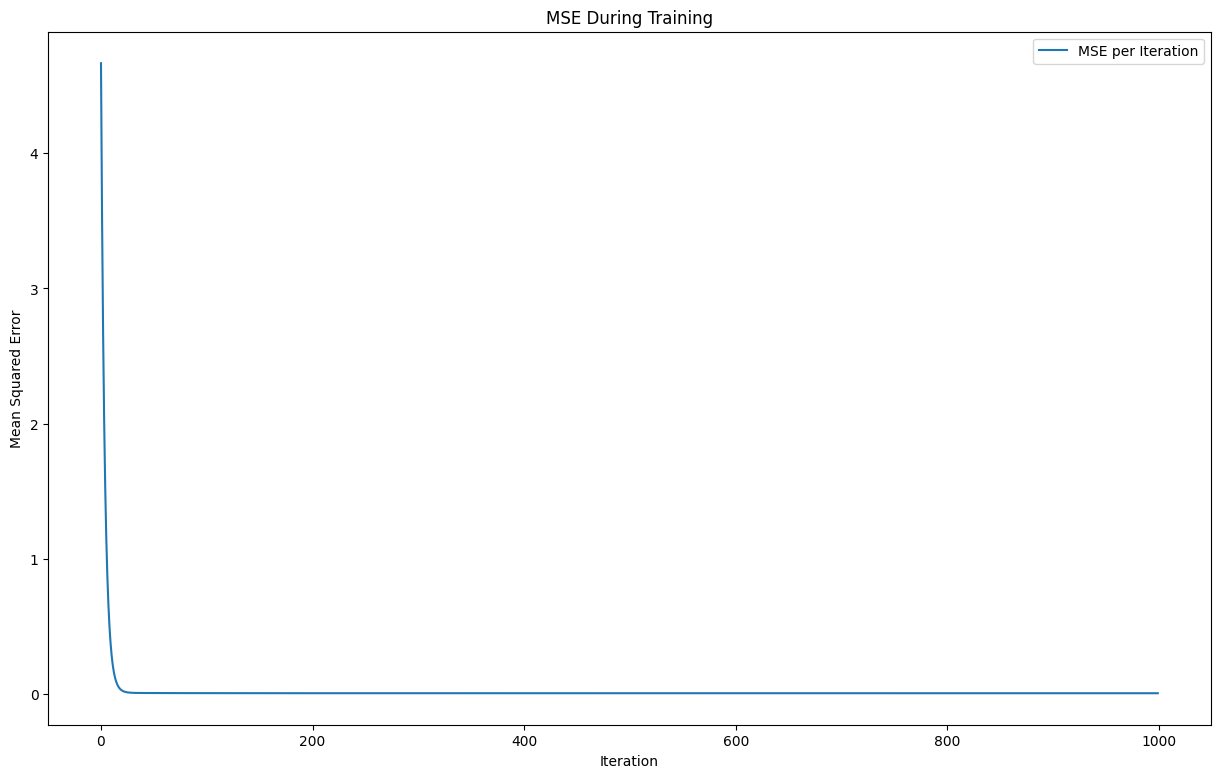

In [44]:
# now call the plot_mse_loss() function to lot the MSE loss.
# plot_mse_loss() # uncomment this with the appropriate parameters.
plot_mse_loss(mse_values)


Now, we'll draw the regression line found by your implementation onto the scatter plot of Dataset 1. For that, we're going to:

1.   Make a scatter plot of train and validation samples using plot_samples() function.
2.   Draw the regression line onto this plot by following the directions in the comments.

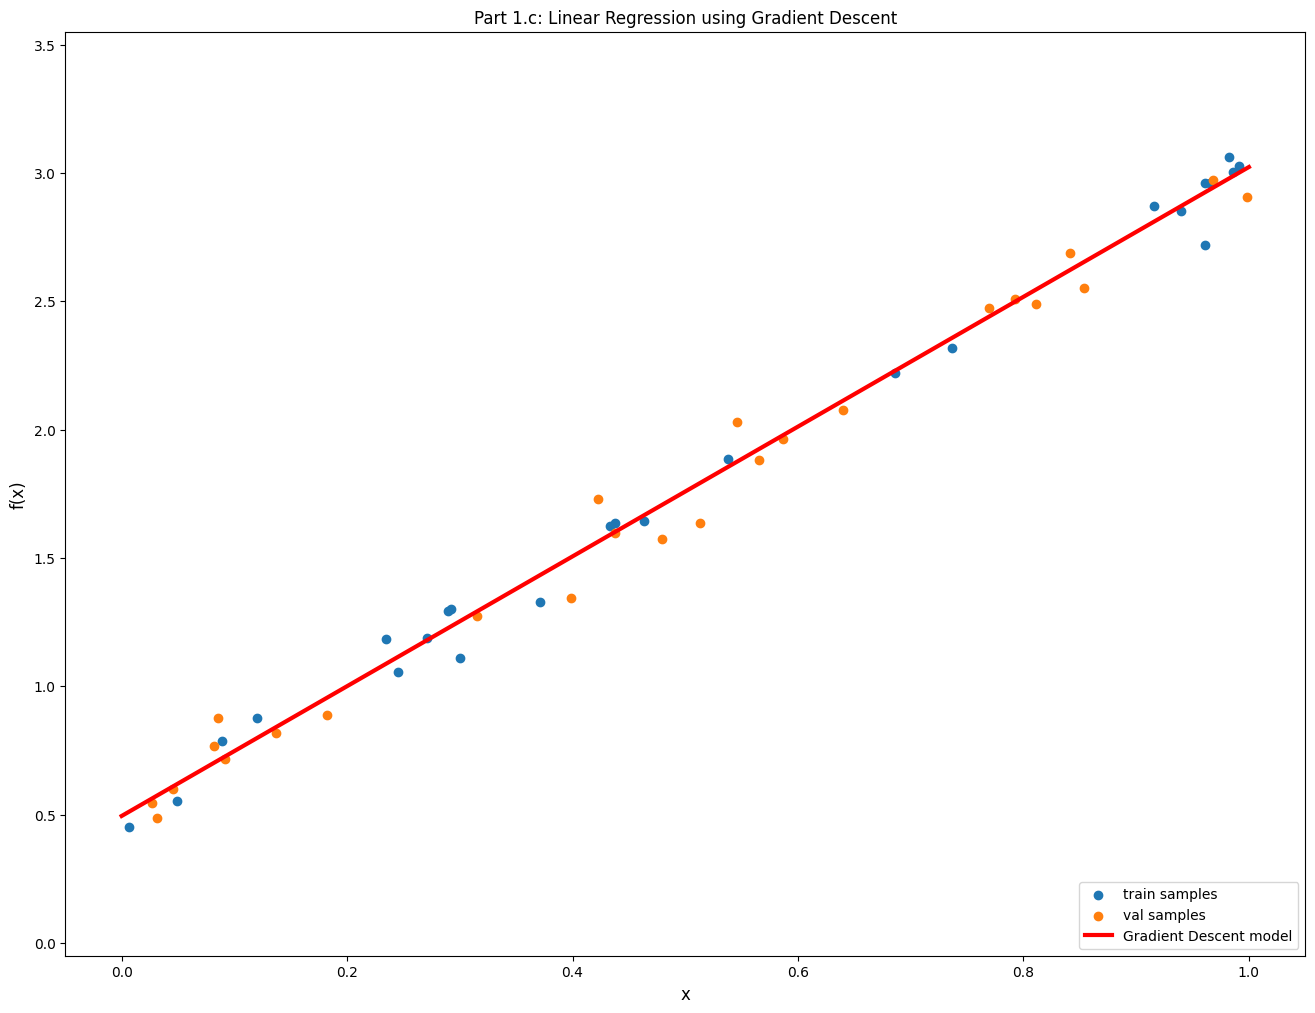

In [46]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
# fig, ax = plot_samples((), ()) # uncomment this line after filling in the parantheses, just like we did above

#x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# first, construct the extended version of x_grid, just like you did to train and validation data matrices
# now, using the regression coefficients, find the model's predictions (y_grid = Xw)

# ax.plot(x_grid, y_grid, color='red', linewidth=3, label='pinv model') # uncomment this line after obtaining y_grid
# ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear

# Make a scatter plot of the train and validation samples
fig, ax = plot_samples(train_data=(x_train, y_train), name="Part 1.c: Linear Regression using Gradient Descent",val_data=(x_val, y_val))

# Create a grid of x values from x_min to x_max (already given)
x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # Reshaped to (100,1)

# Construct the extended version of x_grid (adding a column of ones for bias term)
X_grid_extended = np.concatenate((np.ones((x_grid.shape[0], 1)), x_grid), axis=1)

# Compute predictions using Gradient Descent regression coefficients (y_grid = X * w)
y_grid = np.matmul(X_grid_extended, w_gd)

# Plot the regression line on the scatter plot
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='Gradient Descent model')

# Add legend
ax.legend(loc='lower right')

# Display the modified figure
plt.show()  # Use plt.show() explicitly instead of display(fig)


# Part 2 - Data Generation

In Part 2 of the homework, we are moving from **Dataset 1** which has a **linear** relationship between the input variable (**x**) and the target variable (**y**), to **Dataset 2** which has a **non-linear** relationship between **x** and **y**, requiring the use of non-linear regression techniques to model the relationship, such as polynomial regression.

In this part, we are going to load the data from an **.npy** file, which is a file format used to store numerical data in Python, optimized for use with the NumPy library.

In [48]:
# Load Dataset 2 from .npy files
x = np.load('dataset2_data.npy')
y = np.load('dataset2_labels.npy')

# Split the dataset into 50% training and 50% validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle=False)

# Print shapes to verify the split
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")


x_train shape: (25, 1), y_train shape: (25, 1)
x_val shape: (25, 1), y_val shape: (25, 1)



# Part 2.a

Our objective in Part 2.a is to use the sklearn library for performing linear regression on **polynomial features**. To do this,

1.   We'll use **PolynomialFeatures** from the **sklearn.preprocessing** module to expand our input data matrix **X** with polynomial features.
2.   Then, we'll use **LinearRegression** from **sklearn.linear_model** to fit the model to X.
3.   Make predictions on the validation set.

We'll evaluate the model's performance on the validation set using the **mean squared error (MSE)** metric and print the result.

Try polynomial degrees of 1, 3, 5, and 7 and comment on the best model in your report.

*-Please check the documentation of PolynomialFeatures before starting this part.*

In [49]:
# import the polynomial features object from sklearn.preprocessing module

# order = ... # <-- specify the order of the polynomial features
# construct polynomial features of degree "order" using PolynomialFeatures()
# fit the polynomial features to training data using fit_transform() function of your PolynomialFeatures object
# transform the validation data using transform() function of your PolynomialFeatures object

# initialize linear regression model
# fit the model to the polynomial features of training data
# make predictions on validation set

# evaluate the model's performance on the validation set using mean squared error (MSE)
# print the model's mean squared error using this--> print('MSE of sklearn model: ', mse_sklearn_polynomial)

# Import required modules
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Try polynomial degrees of 1, 3, 5, and 7
degrees = [1, 3, 5, 7]

# Iterate over different polynomial degrees
for order in degrees:
    print(f"\nPolynomial Regression with degree {order}:")

    # 1. Construct polynomial features of the specified degree
    poly = PolynomialFeatures(degree=order)

    # 2. Transform training and validation data
    X_train_poly = poly.fit_transform(x_train)  # Fit and transform training data
    X_val_poly = poly.transform(x_val)  # Transform validation data (only transform, do not fit)

    # 3. Initialize and train the linear regression model
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # 4. Make predictions on validation set
    y_pred = poly_model.predict(X_val_poly)

    # 5. Compute Mean Squared Error (MSE) on the validation set
    mse_sklearn_polynomial = mean_squared_error(y_val, y_pred)

    # 6. Print MSE for the current polynomial degree
    print(f"MSE of sklearn polynomial model (degree {order}): {mse_sklearn_polynomial:.6f}")




Polynomial Regression with degree 1:
MSE of sklearn polynomial model (degree 1): 0.063629

Polynomial Regression with degree 3:
MSE of sklearn polynomial model (degree 3): 0.012059

Polynomial Regression with degree 5:
MSE of sklearn polynomial model (degree 5): 0.007475

Polynomial Regression with degree 7:
MSE of sklearn polynomial model (degree 7): 0.011549


Now we're moving on to the plot. This part is similar to the previous ones, but be careful to pick up small differences.

By looking at the plot, we can get an idea of how well the polynomial regression model fits the data.


Plotting Polynomial Regression (degree 1)


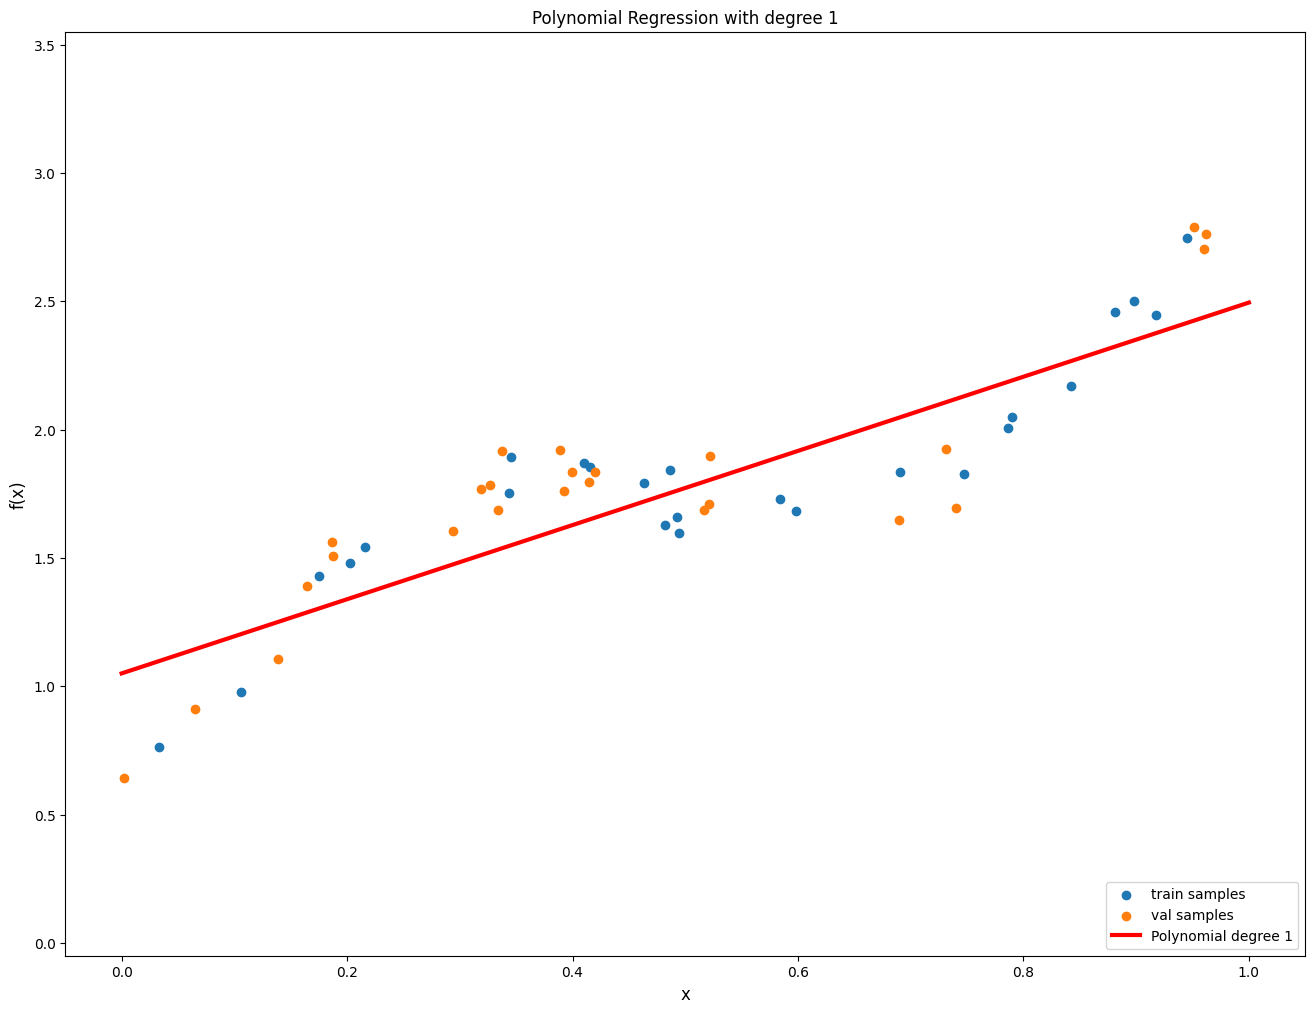


Plotting Polynomial Regression (degree 3)


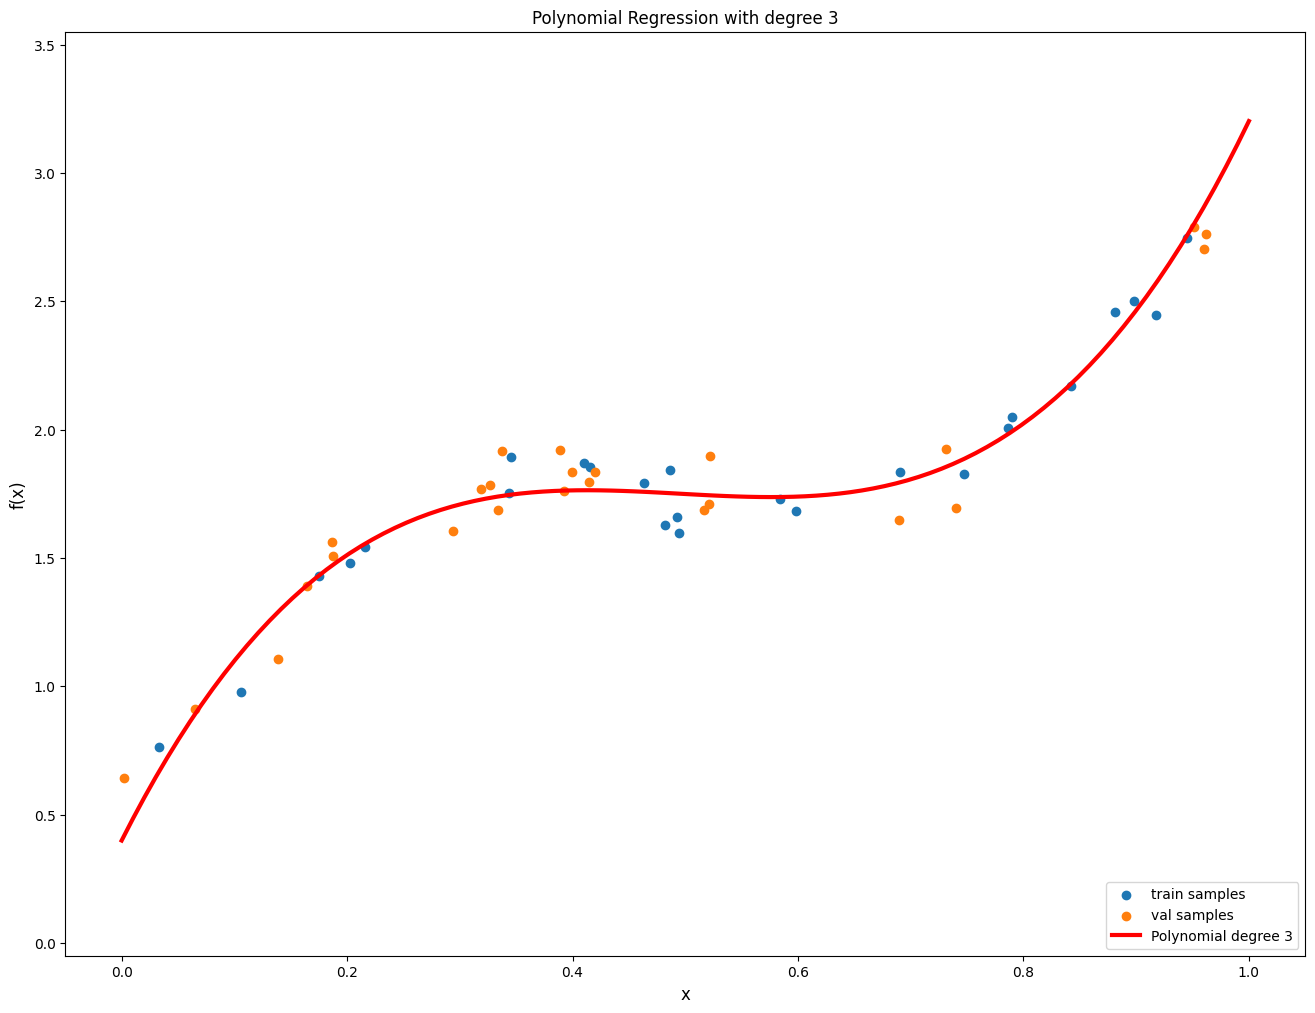


Plotting Polynomial Regression (degree 5)


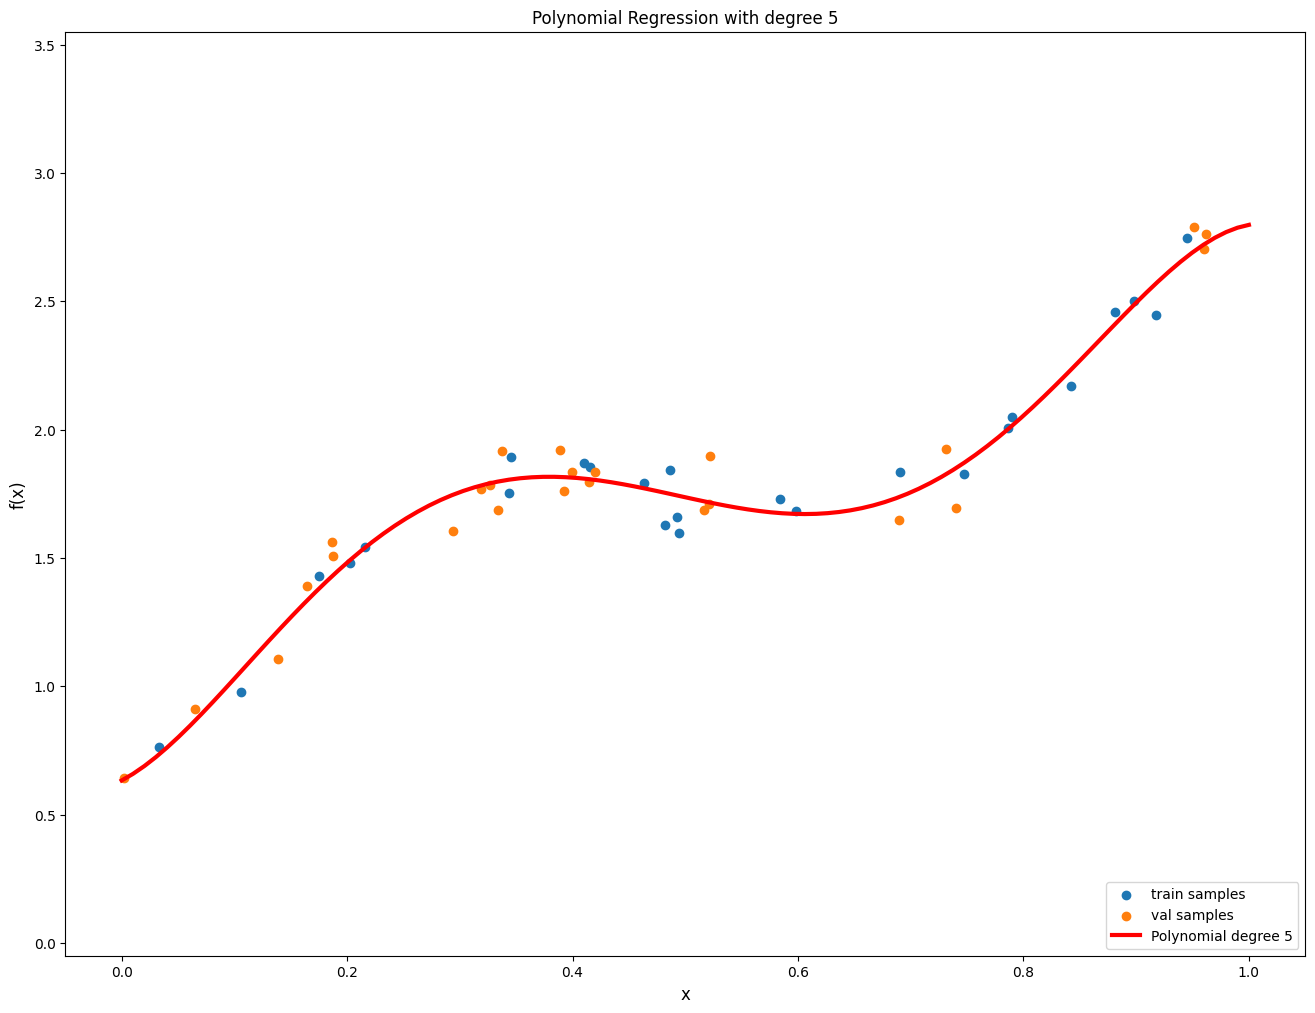


Plotting Polynomial Regression (degree 7)


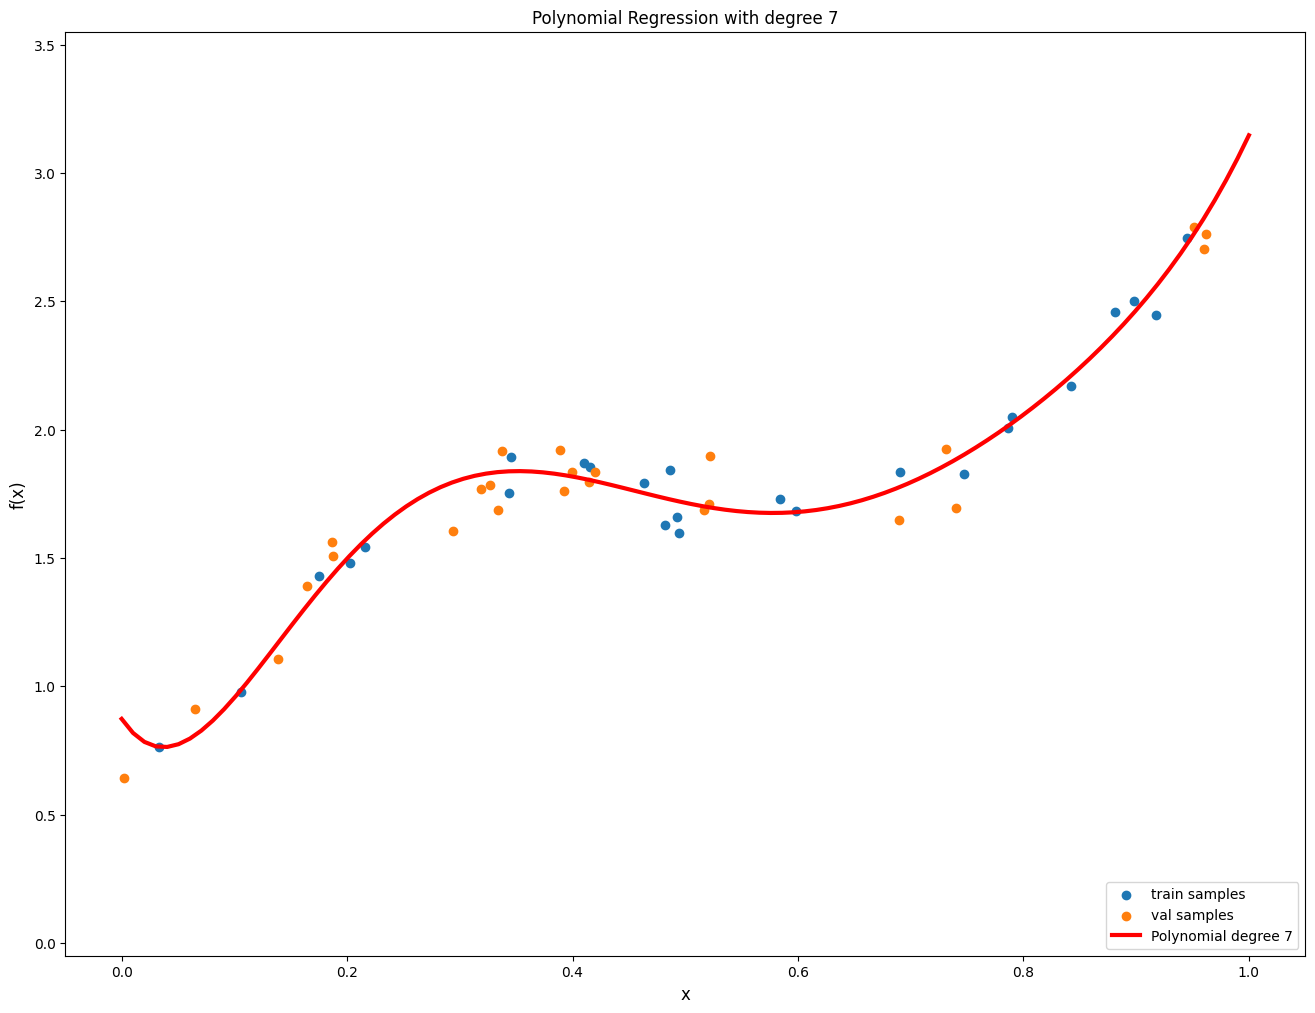

In [50]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
# fig, ax = plot_samples((), ()) # uncomment this line after filling in the parantheses, just like we did above

#x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# transform the x_grid the same way you transformed the validation data
# now use the linear regression model's predict() function on transformed x_grid to find y_grid

# ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
# ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear

# Iterate over different polynomial degrees to visualize regression fits
for order in degrees:
    print(f"\nPlotting Polynomial Regression (degree {order})")

    # Make a scatter plot of the train and validation samples
    name = f"Polynomial Regression with degree {order}"
    fig, ax = plot_samples(train_data=(x_train, y_train), name=name, val_data=(x_val, y_val))

    # Create a PolynomialFeatures transformer
    poly = PolynomialFeatures(degree=order)

    # Transform training and validation data
    X_train_poly = poly.fit_transform(x_train)
    X_val_poly = poly.transform(x_val)

    # Fit a new model for the current polynomial degree
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Create a grid of x values from x_min to x_max
    x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # Reshaped to (100,1)

    # Transform x_grid using the same PolynomialFeatures transformer
    X_grid_poly = poly.transform(x_grid)

    # Predict y values for x_grid using the correctly fitted model
    y_grid = model.predict(X_grid_poly)

    # Plot the polynomial regression curve on the scatter plot
    ax.plot(x_grid, y_grid, color='red', linewidth=3, label=f'Polynomial degree {order}')

    # Add legend and display the figure
    ax.legend(loc='lower right')
    plt.show()  # Use plt.show() to ensure the plot displays properly

# Part 2.b

In this part, we will implement our own polynomial regression algorithm to find the optimal regression coefficients. The main steps are as follows:

1.   Choose the degree of the polynomial regression as **3**. Above, you were asked to vary this and choose the best model (best polynomial degree) according to validation set; however in this part the aim is just to learn the implementation.
2.   Constructing the data matrix **X** that includes a column of ones for the bias (intercept) term.
3.   Taking the pseudo-inverse (pinv) of **X**.
4.   Finding regression coefficients **w** by using the equation **w** = pinv(**X**) * **y**.

*(Note that pinv(**X**) is a (degree+1) x N matrix and **y** is an N x 1 vector. As a result, **w** has dimensions (degree+1) x 1)*

.

.

.

**Illustration for Step 2 of algorithm (for degree 3)**

From $\quad x = \begin{bmatrix}
x_1 \\ x_2\\ \vdots \\ x_N \\
\end{bmatrix}$, we want to obtain $\quad X = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 \\
1 & x_2 & x_2^2 & x_2^3 \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & x_N^2 & x_N^3 \\
\end{bmatrix}$.


where N is the number of samples (in either train or val dataset), and each column holds a power of **x**, starting from 0-th power in the first column, till the **degree** you specified.

In [51]:
#from numpy.linalg import pinv
''' In the next two lines, construct the data matrices containing polynomial features for training and validation,
by adding columns of powers of the original data vector. For this, you can use np.concatenate()
function with the option axis=1. See the function documentation for further information'''
# 1. construct the data matrix for train
# 2. construct the data matrix for val

# print the shapes of the data matrices, just to check

# 3.1. find the pseudoinverse (pinv) of the data matrix
# 3.2. perform the matrix multiplication pinv(X) * y to find regression coefficients (w) ## look up np.matmul() function

# find the models prediction on validation set
# evaluate the model's performance on the validation set using mean squared error (MSE)
# print the model's mean squared error using this --> print('MSE of sklearn model: ', mse_sklearn)

from numpy.linalg import pinv

# Define polynomial degree
degree = 3

# 1. Construct the data matrix for train (adding columns for each polynomial degree)
X_train_manual = np.concatenate([x_train**i for i in range(degree + 1)], axis=1)

# 2. Construct the data matrix for validation
X_val_manual = np.concatenate([x_val**i for i in range(degree + 1)], axis=1)

# Print the shapes of the data matrices to verify correctness
print(f"X_train_manual shape: {X_train_manual.shape}, y_train shape: {y_train.shape}")
print(f"X_val_manual shape: {X_val_manual.shape}, y_val shape: {y_val.shape}")

# 3.1. Compute the pseudoinverse of the training data matrix
X_pinv_manual = pinv(X_train_manual)

# 3.2. Compute the regression coefficients using the pseudo-inverse formula: w = pinv(X) * y
w_manual_poly = np.matmul(X_pinv_manual, y_train)

# Print the manually computed regression coefficients
print("\nRegression Coefficients from manual polynomial regression model:")
for i, coef in enumerate(w_manual_poly):
    print(f"w_{i}: {coef[0]:.4f}")

# Predict on validation set using the manually computed regression coefficients
y_pred_manual_poly = np.matmul(X_val_manual, w_manual_poly)

# Compute Mean Squared Error (MSE) for the manual polynomial regression model
mse_manual_poly = mean_squared_error(y_val, y_pred_manual_poly)

# Print the MSE for comparison
print('\nMSE of manual polynomial regression model: ', format(mse_manual_poly, '.6f'))


X_train_manual shape: (25, 4), y_train shape: (25, 1)
X_val_manual shape: (25, 4), y_val shape: (25, 1)

Regression Coefficients from manual polynomial regression model:
w_0: 0.3988
w_1: 8.6892
w_2: -18.0703
w_3: 12.1840

MSE of manual polynomial regression model:  0.012059


Make a plot

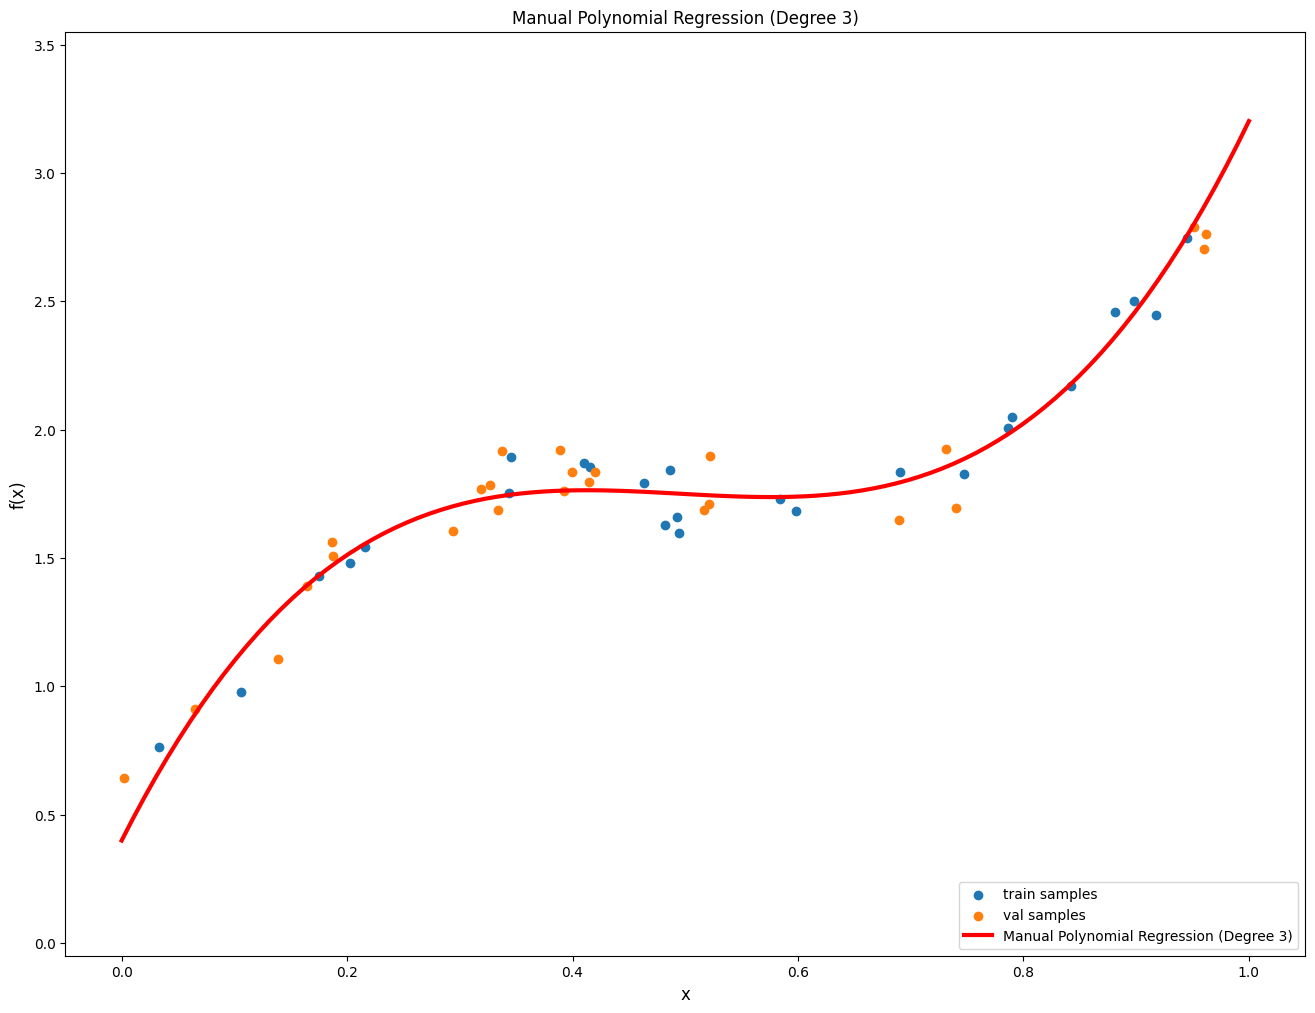

In [52]:
# make a scatter plot of the data in the line below using plot_samples() function using both train and val sets
# fig, ax = plot_samples((), ()) # uncomment this line after filling in the parantheses, just like we did above

#x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis] # do not change anything in this line
# transform the x_grid the same way you transformed the train and val vectors.
# now, using the regression coefficients, find the model's predictions (y_grid = Xw)

# ax.plot(x_grid, y_grid, color='red', linewidth=3, label='sklearn model') # uncomment this line after obtaining y_grid
# ax.legend(loc='lower right') # uncomment this line too
# display(fig) # uncomment this line if the plot doesn't appear


# Make a scatter plot of the train and validation samples
fig, ax = plot_samples(train_data=(x_train, y_train), name="Manual Polynomial Regression (Degree 3)", val_data=(x_val, y_val))

# Create a grid of x values from x_min to x_max
x_grid = np.linspace(x_min, x_max, 100)[..., np.newaxis]  # Reshaped to (100,1)

# Transform the x_grid the same way train and val vectors were transformed
X_grid_manual = np.concatenate([x_grid**i for i in range(degree + 1)], axis=1)

# Compute predictions using manually computed regression coefficients
y_grid = np.matmul(X_grid_manual, w_manual_poly)

# Plot the polynomial regression curve on the scatter plot
ax.plot(x_grid, y_grid, color='red', linewidth=3, label='Manual Polynomial Regression (Degree 3)')

# Add legend and display the figure
ax.legend(loc='lower right')
plt.show()  # Use plt.show() to ensure the plot displays properly


# Report

*   Prepare a PDF report with the following and **include a link to your Colab Notebook at the top. making sure the link public** (You won't receive points from your notebook if this link is missing or not public)!

*   Your report should contain sections in the same order as you're seeing in this notebook and labeled as **Part 1.a Results** etc). **In each part, you should include the regression coefficients you have found in that part and all the plots and MSE errors.**

*   In Part 1, you should comment on whether the gradient descent solution is the same (or very close) to solutions obtained for Part1.a and b. If not, add a line of explanation as to why you think it is not.

*   In Part 2, comment on the effect of the **degree** parameter. What happens when it is chosen too small or too big? What do you think is the optimal **degree** value, and why? Discuss from the perspective of **underfitting**/**overfitting**.